# Ejercicios capítulo 6

Ejercicios prácticos de programación en Python enfocados en conceptos básicos como son:

  - Análisis práctico de datos
  - Métricas Descriptivas Numéricas
  - Visualización de la distribución univariada
  - Análisis Descriptivo por Grupos
  - Cuantificando Relaciones
  - Distribuciones de Probabilidad
  - Algoritmo de regresión
  - Pruebas estadísticas
  - Simulaciones

### Ejercicio 1: Análisis Descriptivo y Visualización de la Variable

**Instrucciones:**
1.  **Importa `pandas` como `pd`.**

2.  **Carga el archivo `.dta` "f_ingreso.data:**

    * Define la variable `path_in` con la ruta a la carpeta donde está el archivo.

    * Usa `pd.read_stata()` para leer el archivo "f_ingreso.dta" y cargarlo en un DataFrame llamado `df` como el siguiente:.

In [ ]:
path_in = "/home/bec/Documents/test/"
df = pd.read_stata(path_in + "f_ingreso.dta")


 * Muestra las primeras 5 filas del DataFrame usando `.head()`.

3.  **Convierte la columna `edad` a valores numéricos:**
   * Usa `pd.to_numeric(..., errors='coerce')` para convertir los valores de edad a tipo numérico.
   * Cualquier valor no numérico (como 'no sabe') se transformará en `NaN`.

In [ ]:
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

* Asegúrate de que la columna edad sea de tipo numérico `(float)`.

4.  **Elimina filas con valores faltantes en `edad`:**
     * Usa `dropna()` para eliminar las observaciones que tengan `NaN`` en la columna `edad`.

5.  **Cálculo de estadísticas descriptivas avanzadas:**
   
 * Importa `scipy.stats` como `stats`.
 * Calcula y muestra:
    * La **varianza** de `edad` usando `.var()`.
    * La **asimetría** (skewness) usando `stats.skew()`.
    * La **curtosis** (no centrada) usando `stats.kurtosis(..., fisher=False)`.

6.  **Obtención de una descripción detallada de `edad:**

  * Usa `.describe()`con los siguientes percentiles personalizados:
    1%, 15%, 30%, 35%, 50%, 75%, 80%, 85%, 99%.

7.  **Visualización de la variable `edad`:**

  * Crea una nueva columna `i` que contenga el número de observación (1 hasta n) usando `range()`.
  * Genera un gráfico de línea simple donde:

     * El eje **X** sea la columna `i`.
     * El eje **Y** sea la variable `edad`.

   * Agrega etiquetas a los ejes, activa la cuadrícula y muestra el gráfico usando `plt.show()`.

    entidad  edad                        raba  edu hextra_edu       w    sexo  \
0  Guerrero  19.0                         NaN  NaN    ninguno   350.0   Mujer   
1  Guerrero  17.0  decidiÓ empezar a trabajar  NaN        NaN   650.0   Mujer   
2  Guerrero  19.0                         NaN  NaN        NaN   250.0  Hombre   
3  Guerrero  15.0                         NaN  NaN        NaN   250.0   Mujer   
4  Guerrero  21.0  decidiÓ empezar a trabajar  NaN        NaN  1500.0  Hombre   

    li  ecivil   dh  reprobacion  trend  
0  1.0     0.0  1.0          0.0    2.0  
1  1.0     1.0  1.0          0.0   14.0  
2  1.0     1.0  1.0          0.0   41.0  
3  1.0     1.0  1.0          0.0   46.0  
4  1.0     0.0  1.0          0.0   53.0  
Varianza de edad: 11.386196846150686
Asimetría (skewness): -0.18836530168290397
Curtosis (no centrada): 2.4604997208380475
count    12038.000000
mean        19.451902
std          3.374344
min          6.000000
1%          12.000000
5%          14.000000
10%   

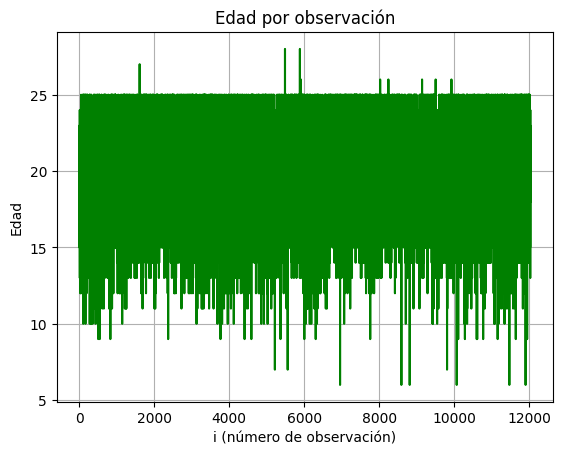

In [ ]:
# 1. Importa pandas como pd y carga los datos desde un archivo .dta
import pandas as pd

# Definir la ruta del archivo
path_in = "/home/bec/Documents/test/"
df = pd.read_stata(path_in + "f_ingreso.dta")

# Mostrar las primeras 5 filas
print(df.head())

# 2. Convertir la columna 'edad' a valores numéricos
# Los valores no numéricos como 'no sabe' serán convertidos a NaN
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

# 3. Asegurarse de que la columna 'edad' sea de tipo float
df['edad'] = df['edad'].astype(float)

# 4. Eliminar filas con valores faltantes en 'edad'
df = df.dropna(subset=['edad'])

# 5. Calcular estadísticas descriptivas de la variable 'edad'
import scipy.stats as stats

varianza = df['edad'].var()
asimetria = stats.skew(df['edad'])
curtosis = stats.kurtosis(df['edad'], fisher=False)

print("Varianza de edad:", varianza)
print("Asimetría (skewness):", asimetria)
print("Curtosis (no centrada):", curtosis)

# 6. Mostrar una descripción estadística detallada con percentiles personalizados
descripcion = df['edad'].describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])
print(descripcion)

# 7. Visualizar los valores de 'edad' por número de observación
import matplotlib.pyplot as plt

# Crear una columna 'i' con el número de observación
df['i'] = range(1, len(df) + 1)

# Graficar la variable 'edad' contra el número de observación
plt.plot(df['i'], df['edad'], linestyle='-', marker='', color='green')
plt.xlabel('i (número de observación)')
plt.ylabel('Edad')
plt.title('Edad por observación')
plt.grid(True)
plt.show()


### Ejercicio 2: Estimación de Densidad con KDE

**Instrucciones:**
1.  **Importa las librerías necesarias:**

     * Importa `numpy` como `np`.
     * Desde `scipy.stats`, importa `gaussian_kde`.
     * Importa `matplotlib.pyplot` como `plt`.

       
2.  **Selecciona la variable edad del DataFrame:**

    * Asigna la columna `edad` de `df` a una variable llamada `data`.
  
3. **Construye una estimación de densidad KDE para la variable edad:**

     * Usa `gaussian_kde(data)` para obtener la densidad estimada.
     * Crea un rango de valores `(x_range)` desde el mínimo al máximo de edad con `np.linspace`.

4. **Grafica la estimación de densidad:**

     * Usa `plt.plot()` para graficar la densidad.
     * Agrega título y etiquetas.
     * Muestra el gráfico con `plt.show()`.

5. **Grafica un histograma de edad junto con la curva KDE:**

     * Usa `plt.hist()` con `density=True` para representar el histograma como densidad.
     * Superpón la curva de densidad con `plt.plot()` usando `x_range` y `kde`.


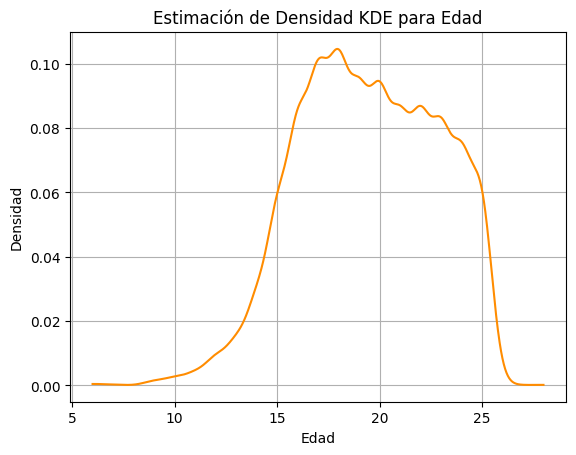

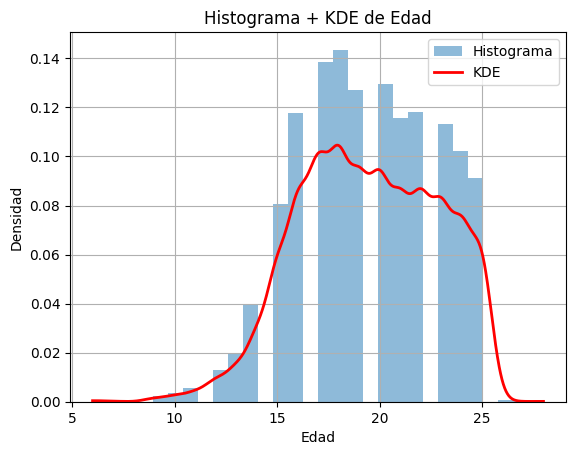

In [ ]:
# 1. Importar librerías necesarias
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# 2. Seleccionar la variable 'edad'
data = df['edad']  # Se asume que ya está limpia y es numérica

# 3. Estimar la densidad con KDE
kde = gaussian_kde(data)

# 4. Crear un rango de valores desde el mínimo hasta el máximo de 'edad'
x_range = np.linspace(data.min(), data.max(), 1000)

# 5. Graficar solo la curva KDE
plt.plot(x_range, kde(x_range), color='darkorange')
plt.title('Estimación de Densidad KDE para Edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# 6. Graficar histograma + KDE
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histograma')
plt.plot(x_range, kde(x_range), color='red', linewidth=2, label='KDE')
plt.title('Histograma + KDE de Edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

### Ejercicio 3: Visualización de la relación entre Edad y la Razón de Abandono Escolar

**Instrucciones:**
1.  **Importa las librerías necesarias:**

     * Importa `numpy` como `np`.
     * Importa `seaborn` como `sns`.
     * Importa `matplotlib.pyplot` como `plt`.
       
2.  **Crea un diccionario de codificación para la variable `raba`**

    * Asigna un valor numérico a las razones más comunes.
  
3. **Crea una nueva columna numérica `raba_num` usando el mapeo:**

4. **Crea el gráfico de regresión:**

     * Usa `sns.regplot()` con `raba_num` como eje **X** y `edad` como eje **Y**.
     * Agrega título y etiquetas.
     * Muestra el gráfico con `plt.show()`.


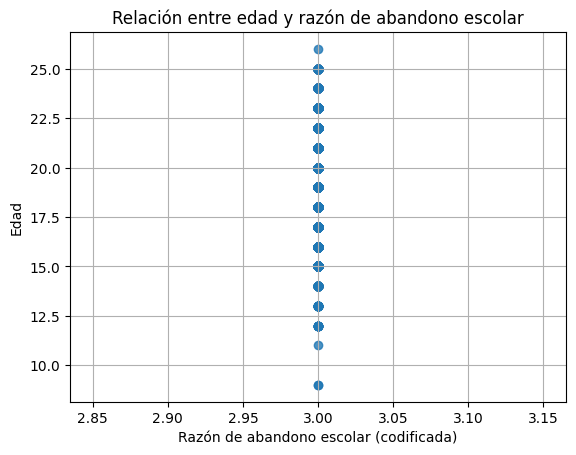

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario para codificar la variable 'raba'
raba_order = {
    'decidió empezar a trabajar': 1,
    'no alcanzó el dinero para mandarlo': 2,
    'no le gustaba la escuela': 3,
    'ya concluyó sus estudios': 4
}

# Crear nueva columna codificada
df['raba_num'] = df['raba'].map(raba_order)

# Crear gráfico de regresión entre raba y edad
sns.regplot(data=df, x='raba_num', y='edad', scatter=True, ci=None)
plt.xlabel('Razón de abandono escolar (codificada)')
plt.ylabel('Edad')
plt.title('Relación entre edad y razón de abandono escolar')
plt.grid(True)
plt.show()


### Ejercicio 4: Visualización de la distribución de Edad con histograma y ajuste de distribución normal


   **Instrucciones:**
1.  **Importa las librerías necesarias:**

     * Importa `numpy` como `np`.
     * Desde `scipy.stats`, importa `norm`.
     * Importa `matplotlib.pyplot` como `plt`.
       
2.  **Selecciona la variable `edad` del DataFrame:**

    * Asigna la columna `edad` de df a una variable llamada `edad_data`.
    * Elimina valores faltantes si los hay con `.dropna()`.
  
3. **Calcula la media `(mu)` y desviación estándar `(sigma)` de la variable `edad_data`:**

     * Usa la función `np.mean()` para obtener la media `(μ)` de la variable `edad_data`.
     * Usa la función `np.std()` para obtener la desviación estándar `(σ)` de la variable `edad_data`.

4. **Genera un rango de valores x desde el mínimo al máximo de `edad_data` para graficar la curva normal ajustada.**

     * Utiliza `np.linspace()` para crear un arreglo de 100 valores equiespaciados entre el mínimo y el máximo de la variable `edad_data`.
     * Usa la función `norm.pdf()` para calcular la función de densidad de probabilidad `(PDF)` de la distribución normal, utilizando los parámetros `mu` y `sigma`.

5. **Grafica un histograma de `edad_data` con densidad y superpone la curva de distribución normal ajustada:**

     * Usa `plt.hist()` con `density=True` para representar el histograma como densidad.
     * Usa `plt.plot()` para graficar la función de densidad de probabilidad `(PDF)` de la distribución normal ajustada.
     * Agrega título y etiquetas.
     * Muestra el gráfico con `plt.show()`.


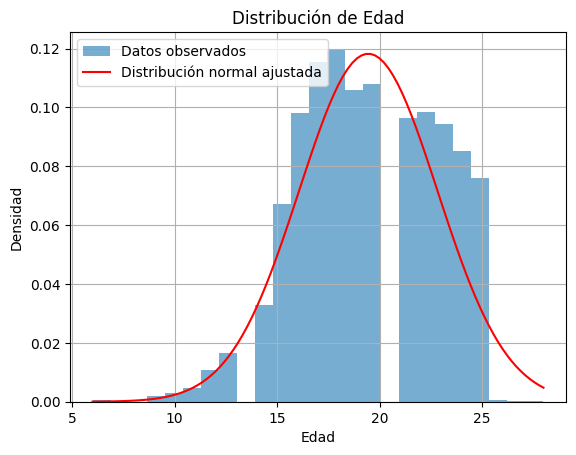

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 2. Selección de datos
edad_data = df['edad'].dropna()

# 3. Calcular media y desviación estándar
mu = np.mean(edad_data)
sigma = np.std(edad_data)

# 4. Crear rango para distribución normal ajustada
x = np.linspace(min(edad_data), max(edad_data), 100)

# 5. Calcular PDF y graficar histograma y curva ajustada
pdf = norm.pdf(x, mu, sigma)

plt.hist(edad_data, bins=25, density=True, alpha=0.6, label="Datos observados")
plt.plot(x, pdf, 'r-', label="Distribución normal ajustada")
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


### Ejercicio 5: Cálculo de la correlación de Spearman entre Edad y Horas Extra de Educación

**Instrucciones:**
1.  **Importa las librerías necesarias:**

     * Importa `pandas` como `pd`.
     * Desde `scipy.stats`, importa `spearmanr`.
       
2.  **Asegúrate de que las columnas `edad` y `hextra_edu` sean numéricas:**

    * Convierte los valores no numéricos a `NaN` usando `pd.to_numeric` con `errors='coerce`'.
  
3. **Calcula la correlación de Spearman entre `edad` y `hextra_edu`, omitiendo valores `NaN`.**

     * Pasa como argumentos las columnas numéricas `df['edad']` y `df['hextra_edu']`.
     * Asegúrate de usar el parámetro `nan_policy='omit'` para que los valores `NaN` se ignoren en el cálculo
     * Guarda el coeficiente de correlación en una variable llamada "corr" y el valor "p" en una variable llamada `p_value`.
       
4. **Imprime el número de observaciones usadas, el coeficiente de correlación y el valor p:**

     * Primero, calcula el número de observaciones válidas que tienen datos en ambas columnas sin valores faltantes. Para ello, selecciona las dos columnas, elimina las filas con `NaN` usando `dropna()`, y cuenta las filas restantes con `.shape[0]`.
     * Imprime este número con un mensaje descriptivo.
     * Finalmente, imprime el valor de la correlación de Spearman (corr) y el valor p (p_value), ambos con 4 decimales para mayor claridad.

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Convertir columnas a numéricas, errores a NaN
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')
df['hextra_edu'] = pd.to_numeric(df['hextra_edu'], errors='coerce')

# Calcular correlación de Spearman omitiendo NaN
corr, p_value = spearmanr(df['edad'], df['hextra_edu'], nan_policy='omit')

# Número de observaciones con datos no NaN en ambas columnas
num_obs = df[['edad', 'hextra_edu']].dropna().shape[0]

print("Número de observaciones:", num_obs)
print(f"Spearman rho: {corr:.4f}")
print(f"P-value: {p_value:.4f}")


Número de observaciones: 708
Spearman rho: 0.2746
P-value: 0.0000


### Ejercicio 6: Simulación y estimación de parámetros de una distribución Log-Normal

**Instrucciones:**
1.  **Importa las librerías necesarias:**

     * Importa `numpy` como `np`.
     * Importa `stats` desde `scipy`
       
2.  **Fija una semilla aleatoria para reproducibilidad:**

    * Usa `np.random.seed(42)` para asegurar que los resultados sean consistentes al correr el código varias veces.
  
3. **Define los parámetros reales del logaritmo de la distribución log-normal:**

     * Define `mu_log_real` como el logaritmo de 3.5 (media del logaritmo).
     * Define `sigma_log_real` como 0.4 (desviación estándar del logaritmo).

4. **Genera una muestra simulada de 1000 datos con distribución log-normal:**

     * Usa `np.random.lognormal()` con los parámetros definidos y tamaño 1000.

5. **Ajusta una distribución log-normal a los datos simulados para estimar sus parámetros:**

     * Utiliza la función `stats.lognorm.fit()`.
     * Fija `loc=0` (parámetro de ubicación) con floc=0 para ajustar solo escala y forma.

6. **Extrae los parámetros estimados y calcula la media y desviación estándar del logaritmo a partir de ellos:**

     * `shape_est` corresponde a la desviación estándar del logaritmo estimada.
     * `scale_est` permite calcular la media del logaritmo estimada como `np.log(scale_est)`.

7.  **Imprime los parámetros reales y estimados para comparar:**

In [ ]:
import numpy as np
from scipy import stats

# 2. Semilla para reproducibilidad
np.random.seed(42)

# 3. Parámetros reales del logaritmo
mu_log_real = np.log(3.5)  # media logarítmica real (~1.2528)
sigma_log_real = 0.4       # desviación estándar logarítmica real

# 4. Generar datos simulados log-normales
ingresos_lognormal = np.random.lognormal(mean=mu_log_real, sigma=sigma_log_real, size=1000)

# 5. Ajustar distribución log-normal a los datos simulados
shape_est, loc_est, scale_est = stats.lognorm.fit(ingresos_lognormal, floc=0)

# 6. Parámetros estimados del logaritmo
sigma_log_estimado = shape_est
mu_log_estimado = np.log(scale_est)

# 7. Imprimir parámetros reales y estimados
print("\n--- DISTRIBUCIÓN LOG-NORMAL ---")
print(f"Parámetro 'μ' real (media del log): {mu_log_real:.4f}")
print(f"Parámetro 'μ' estimado (media del log): {mu_log_estimado:.4f}\n")
print(f"Parámetro 'σ' real (std dev del log): {sigma_log_real:.4f}")
print(f"Parámetro 'σ' estimado (std dev del log): {sigma_log_estimado:.4f}")



--- DISTRIBUCIÓN LOG-NORMAL ---
Parámetro 'μ' real (media del log): 1.2528
Parámetro 'μ' estimado (media del log): 1.2605

Parámetro 'σ' real (std dev del log): 0.4000
Parámetro 'σ' estimado (std dev del log): 0.3915


### Ejercicio 7: Regresión lineal para predecir la edad a partir de variables

**Instrucciones:**
1.  **Importa las librerías necesarias:**
     * Importa numpy como np.
     * Importa pandas como pd.
     * Desde statsmodels.api, importa sm.


2.  **Crea una copia del DataFrame con las variables relevantes para el modelo:**
     * Define un diccionario llamado edu_order que asigne un número a cada nivel educativo.
     * Usa el método .map() para transformar la columna edu en una columna nueva llamada edu_num.

       
3.  **Crea una columna numérica a partir del nivel educativo (edu):**
    * Selecciona las siguientes columnas del DataFrame df y guárdalas en un nuevo DataFrame llamado df_reg:
       * 'edad' (variable dependiente),
       * 'ecivil' (estado civil),
       * 'edu_num' (nivel educativo codificado como número),
       * 'dh' (jefe de hogar),
       * 'hextra_edu' (horas extra de educación).
  
4. **Transforma la variable hextra_edu a formato numérico:**
     * Crea un diccionario para mapear los valores de texto:
        * 'ninguno' → 0
        * 'no sabe' → 98
     * Usa .replace() para aplicar este mapeo y guarda el resultado en una nueva columna 'hextra_edu_num'.
     * Convierte esa columna a tipo numérico con pd.to_numeric(..., errors='coerce').

5. **Elimina las observaciones con valores faltantes y reinicia el índice:**
     * Usa .dropna() para quitar filas con NaN.
     * Usa .reset_index(drop=True) para reiniciar los índices del DataFrame limpio.

6. **Define la variable dependiente (y) y las independientes (X):**
     * Define y como la columna 'edad'.
     * Define X como un DataFrame que incluya:
        * 'ecivil', 'edu_num', 'dh' y 'hextra_edu_num'.

7. **Agrega una constante al modelo:**
     * Usa sm.add_constant(X) para incluir el intercepto en el modelo.

8.  **Ajusta el modelo de regresión lineal usando statsmodels:**
     * Utiliza sm.OLS(y, X).fit() para estimar los coeficientes.
       
9.  **Calcula y muestra la Raíz del Error Cuadrático Medio (RMSE) y el resumen del modelo:**
     * Usa np.sqrt(model.mse_resid) para calcular el RMSE.
     * Imprime el valor del RMSE y el resumen completo con model.summary().

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 1. Crear columna 'edu_num' a partir de 'edu'
edu_order = {
    'primaria': 1,
    'secundaria': 2,
    'preparatoria o bachillerato': 3,
    'normal básica': 4,
    'carrera técnica o comercial': 5,
    'profesional': 6,
    'posgrado': 7
}

df['edu_num'] = df['edu'].map(edu_order)

# 2. Copia del DataFrame con variables relevantes
df_reg = df[['edad', 'ecivil', 'edu_num', 'dh', 'hextra_edu']].copy()

# 3. Reemplazo de valores no numéricos en hextra_edu
hextra_map = {'ninguno': 0, 'no sabe': 98}
df_reg['hextra_edu_num'] = df_reg['hextra_edu'].replace(hextra_map)
df_reg['hextra_edu_num'] = pd.to_numeric(df_reg['hextra_edu_num'], errors='coerce')

# 4. Eliminar valores faltantes
df_reg = df_reg.dropna().reset_index(drop=True)

# 5. Definir variable dependiente e independientes
y = df_reg['edad']
X = df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]

# 6. Agregar constante
X = sm.add_constant(X)

# 7. Estimar el modelo
model = sm.OLS(y, X).fit()

# 8. Calcular RMSE e imprimir resultados
root_mse = np.sqrt(model.mse_resid)

print("Root MSE:", round(root_mse, 2))
print(model.summary())

Root MSE: 2.48
                            OLS Regression Results                            
Dep. Variable:                   edad   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          4.83e-105
Time:                        10:56:02   Log-Likelihood:                -1614.0
No. Observations:                 695   AIC:                             3238.
Df Residuals:                     690   BIC:                             3261.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.8266    

### Ejercicio 8: Prueba de normalidad de los residuos del modelo de regresión

**Instrucciones:**
1.  **Importa las librerías necesarias:**
     * Desde scipy.stats, importa las funciones:
          * normaltest para realizar la prueba de normalidad de D’Agostino y Pearson.
          * skew para calcular la asimetría (skewness).
          * kurtosis para calcular la curtosis.
          * chi2 para acceder a distribuciones chi-cuadrado, si deseas comparar.
       
2.  **Obtén los residuos del modelo de regresión:**
    * Extrae los residuos del modelo previamente estimado usando model.resid.
    * Guarda los residuos en una variable llamada residuales.
    * Calcula el número total de observaciones con len(residuales) y guárdalo en n_obs.
    
  
3. **Calcula las estadísticas de forma de la distribución de los residuos:**
     * Usa skew(..., bias=False) para calcular la asimetría de los residuos.
     * Usa kurtosis(...) para calcular la curtosis de los residuos.

4. **Realiza una prueba de normalidad sobre los residuos:**
     * Usa normaltest(residuales) para calcular:
          * El valor estadístico combinado (basado en asimetría y curtosis).
          * El valor p (p-value) asociado.

5. **Define la variable dependiente (y) y las independientes (X):**
     * El valor p (p-value) asociado.
     * Si el valor p es menor a 0.05, rechaza la hipótesis nula de normalidad y concluye que los residuos no están normalmente distribuidos.
     * Si el p-value es mayor o igual a 0.05, no rechazas la hipótesis nula, y los residuos podrían ser normales.
       

In [ ]:
from scipy.stats import normaltest, skew, kurtosis, chi2

# 2. Obtener residuos del modelo
residuales = model.resid
n_obs = len(residuales)

# 3. Calcular asimetría y curtosis
skew_val = skew(residuales, bias=False)
kurtosis_val = kurtosis(residuales)

# 4. Prueba de normalidad (D’Agostino y Pearson)
statistics, pvalue = normaltest(residuales)

# 5. Mostrar resultados
print(f"Skew: {skew_val:.4f}")
print(f"Kurtosis: {kurtosis_val:.4f}")
print(f"Statistics: {statistics:.4f}")
print(f"P-value: {pvalue:.4f}")

if pvalue < 0.05:
    print(" Se rechaza la hipótesis nula:")
    print("   ¡Los residuos no siguen una distribución normal!")
else:
    print(" No se rechaza la hipótesis nula:")
    print("   Los residuos podrían estar normalmente distribuidos.")


Skew: 0.9475
Kurtosis: 2.5681
Statistics: 124.1206
P-value: 0.0000
 Se rechaza la hipótesis nula:
   ¡Los residuos no siguen una distribución normal!


### Ejercicio 9: Prueba de heterocedasticidad con Breusch-Pagan

**Instrucciones:**
1.  **Importa las librerías necesarias:**
    * Desde statsmodels.stats.diagnostic, importa la función het_breuschpagan.
       
2.  **Obtén los residuos del modelo:**
    * Usa model.resid para guardar los residuos del modelo en una variable llamada residuales.
  
3. **Ejecuta la prueba de Breusch-Pagan:**
     * Usa het_breuschpagan(residuales, model.model.exog) para obtener los estadísticos necesarios.
          * El primer argumento son los residuos.
          * El segundo argumento son las variables explicativas originales del modelo (model.model.exog).
    

4. **Guarda los resultados en las variables:**
     * bp_stat: estadístico chi-cuadrado del test.
     * bp_pval: valor p del estadístico chi-cuadrado.
     * f_stat: estadístico F del test.
     * f_pval: valor p del estadístico F.

5. **Interpreta los resultados:**
     * Imprime todos los estadísticos y valores p.
     * Si el valor p (bp_pval) es menor a 0.05, se rechaza la hipótesis nula de homocedasticidad, lo que indica que los residuos presentan heterocedasticidad.
     * Si el valor p es mayor o igual a 0.05, no hay evidencia de heterocedasticidad.
       

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# 2. Obtener residuos del modelo
residuales = model.resid

# 3. Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuales, model.model.exog)
bp_stat, bp_pval, f_stat, f_pval = bp_test

# 4. Interpretar resultados
print(f"Breusch-Pagan test statistic (chi²): {bp_stat:.4f}")
print(f"P-value (LM test): {bp_pval:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value (F test): {f_pval:.4f}")

if bp_pval < 0.05:
    print(" Se rechaza la hipótesis nula:")
    print("   Los residuos presentan heterocedasticidad.")
else:
    print(" No se rechaza la hipótesis nula:")
    print("   No hay evidencia de heterocedasticidad.")


Breusch-Pagan test statistic (chi²): 5.7088
P-value (LM test): 0.2220
F-statistic: 1.4287
P-value (F test): 0.2228
 No se rechaza la hipótesis nula:
   No hay evidencia de heterocedasticidad.


### Ejercicio 10: Prueba de especificación del modelo (RESET de Ramsey)

**Instrucciones:**
1.  **Importa las librerías necesarias:**
    * Importa numpy como np.
    * Desde statsmodels.api, importa OLS (se accede a través de sm.OLS).
       
2.  **Obtén las variables relevantes del modelo ajustado:**
    * Asigna los valores ajustados del modelo a la variable fitted_values con model.fittedvalues.
    * Asigna las variables explicativas originales del modelo a la variable exog con model.model.exog.
  
3. **Crea transformaciones no lineales de los valores ajustados (ŷ):**
     * Calcula yhat², yhat³ y yhat⁴ como:
          * yhat2 = fitted_values**2
          * yhat3 = fitted_values**3
          * yhat4 = fitted_values**4
    

4. **Construye una nueva matriz de regresores aumentada:**
     * Usa np.column_stack() para combinar las variables originales (exog) con yhat2, yhat3, yhat4.
     * Asigna esta matriz a la variable exog_augmented.

5. **Ajusta un nuevo modelo de regresión usando esta matriz aumentada:**
     * Usa sm.OLS(model.model.endog, exog_augmented).fit() para estimar un nuevo modelo con las variables originales y sus potencias.
     * Guarda el resultado en augmented_model.
  
6.  **Realiza un contraste F para las nuevas variables agregadas:**
     * Crea una matriz de restricciones que indique que los coeficientes de yhat2, yhat3, y yhat4 deben ser cero.
     * Usa augmented_model.f_test(...) para ejecutar la prueba F y guarda el resultado en f_test.
       
7.  **Interpreta el resultado:**
     *  Imprime el estadístico F y su valor p}
     *  Si el valor p es menor a 0.05:
        * Se rechaza la hipótesis nula, lo que indica que el modelo puede tener variables omitidas o una forma funcional incorrecta.

     * Si el valor p es mayor o igual a 0.05:
         * No hay evidencia de problemas de especificación.

In [ ]:
import statsmodels.api as sm
import numpy as np

# 2. Obtener valores del modelo
fitted_values = model.fittedvalues
exog = model.model.exog

# 3. Crear potencias de los valores ajustados
yhat2 = fitted_values**2
yhat3 = fitted_values**3
yhat4 = fitted_values**4

# 4. Construir matriz de regresores aumentada
exog_augmented = np.column_stack((exog, yhat2, yhat3, yhat4))

# 5. Estimar el nuevo modelo
augmented_model = sm.OLS(model.model.endog, exog_augmented).fit()

# 6. Realizar prueba F para evaluar si los coeficientes de yhat², yhat³ y yhat⁴ son significativamente distintos de cero
restrictions = np.zeros((3, exog_augmented.shape[1]))
restrictions[:, -3:] = np.eye(3)

f_test = augmented_model.f_test(restrictions)

# 7. Interpretar resultados
print(f"F-statistic: {f_test.statistic:.4f}")
print(f"P-value: {f_test.pvalue:.4f}")

if f_test.pvalue < 0.05:
    print(" Se rechaza la hipótesis nula:")
    print("   El modelo podría tener variables omitidas o una forma funcional incorrecta.")
else:
    print(" No se rechaza la hipótesis nula:")
    print("   No hay evidencia de especificación incorrecta.")



F-statistic: 31.0696
P-value: 0.0000
 Se rechaza la hipótesis nula:
   El modelo podría tener variables omitidas o una forma funcional incorrecta.


### Ejercicio 11: Detección de multicolinealidad con VIF

**Instrucciones:**
1.  **Importa las librerías necesarias:**
    * Desde statsmodels.stats.outliers_influence, importa variance_inflation_factor.
    *  Importa pandas como pd.
      
2.  **Prepara la matriz de variables explicativas (X):**
    * Crea una nueva matriz X a partir del DataFrame df_reg con las siguientes columnas:
         * 'ecivil'
         * 'edu_num'
         * 'dh'
         * 'hextra_edu_num'
    * Agrega una constante a X utilizando sm.add_constant(X) para incluir el intercepto en el análisis.
  
3. **Calcula el VIF (Variance Inflation Factor):**
     * Usa una comprensión de listas para calcular el VIF de cada variable en X.
     * Crea un DataFrame vif_data con dos columnas:
          * "Variable": nombres de las variables.
          * "VIF": los valores correspondientes del VIF.

4. **Calcula la Tolerancia (1/VIF):**
     * Añade una columna "1/VIF" al DataFrame vif_data calculando el inverso del VIF para cada variable.

5. **Calcula el VIF promedio (excluyendo la constante):**
     * Filtra vif_data para excluir "const" y calcula el promedio de los VIFs restantes.
     * Guarda el valor en la variable mean_vif.
       
6.  **Interpreta el resultado:**
     *  Imprime el DataFrame vif_data con VIF y Tolerancia.
     *  Si alguna variable tiene VIF > 5, emite una advertencia de posible multicolinealidad severa.
     *  Si todas las variables tienen VIF ≤ 5, concluye que no hay multicolinealidad significativa.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 2. Preparar matriz X con variables independientes
X = df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
X = sm.add_constant(X)  # Agregar intercepto

# 3. Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. Calcular Tolerancia (1/VIF)
vif_data["1/VIF"] = 1 / vif_data["VIF"]

# 5. Calcular VIF promedio excluyendo la constante
mean_vif = vif_data.loc[vif_data["Variable"] != "const", "VIF"].mean()

# 6. Interpretar resultados
print(vif_data)
print(f"\nMean VIF: {mean_vif:.2f}")

if (vif_data["VIF"] > 5).any():
    print(" Advertencia: Se detecta multicolinealidad alta (VIF > 5) en al menos una variable.")
else:
    print(" No se detecta multicolinealidad significativa (todos los VIFs ≤ 5).")


         Variable        VIF     1/VIF
0           const  51.839996  0.019290
1          ecivil   1.002515  0.997491
2         edu_num   1.123302  0.890233
3              dh   1.030999  0.969933
4  hextra_edu_num   1.113864  0.897775

Mean VIF: 1.07
 Advertencia: Se detecta multicolinealidad alta (VIF > 5) en al menos una variable.


### Ejercicio 12: Regresión lineal con transformación logarítmica

**Instrucciones:**
1.  **Importa las librerías necesarias:**
    * Importa numpy como np.
    * Importa pandas como pd.
    * Desde statsmodels.api, importa OLS y add_constant.
       
2.  **Transforma la variable edad usando logaritmo natural:**
    * Crea una nueva columna llamada 'log_edad' que contenga el logaritmo natural de la columna 'edad'.
    * Usa np.log(df['edad']).
  
3. **Prepara el subconjunto de datos para el modelo:**
     * Crea un nuevo DataFrame df_reg2 con las siguientes columnas:
          * 'log_edad', 'ecivil', 'edu_num', 'dh', 'hextra_edu'.
    

4. **Codifica la columna 'hextra_edu':**
     * Usa un diccionario para mapear:
          * 'ninguno' → 0
          * 'no sabe' → 98
     * Aplica .replace() y guarda el resultado en la columna 'hextra_edu_num'.

5. **Convierte 'hextra_edu_num' a tipo numérico:**
     * Utiliza pd.to_numeric() y convierte errores en NaN.

6.  **Elimina registros con valores faltantes (NaN):**
     * Aplica .dropna() al DataFrame y reinicia el índice.
       
7.  **Define las variables para la regresión:**
     * Variable dependiente: y2 = df_reg2['log_edad'].
     * Variables independientes: ecivil, edu_num, dh, hextra_edu_num.
     * Agrega una constante a X2 con sm.add_constant(X2).

       
8.   **Ajusta el modelo de regresión lineal:**
     * Usa sm.OLS() para estimar el modelo.
     * Muestra el resumen del modelo con .summary().

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 2. Transformar 'edad' usando logaritmo natural
df['log_edad'] = np.log(df['edad'])

# 3. Crear DataFrame con variables relevantes
df_reg2 = df[['log_edad', 'ecivil', 'edu_num', 'dh', 'hextra_edu']].copy()

# 4. Mapear categorías de 'hextra_edu'
hextra_map = {'ninguno': 0, 'no sabe': 98}
df_reg2['hextra_edu_num'] = df_reg2['hextra_edu'].replace(hextra_map)

# 5. Convertir a numérico
df_reg2['hextra_edu_num'] = pd.to_numeric(df_reg2['hextra_edu_num'], errors='coerce')

# 6. Eliminar filas con valores faltantes
df_reg2 = df_reg2.dropna().reset_index(drop=True)

# 7. Definir X e y para la regresión
X2 = df_reg2[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
y2 = df_reg2['log_edad']
X2 = sm.add_constant(X2)

# 8. Estimar el modelo
model2 = sm.OLS(y2, X2).fit()

# Mostrar resultados
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:               log_edad   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     164.8
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           5.47e-99
Time:                        11:51:33   Log-Likelihood:                 239.31
No. Observations:                 695   AIC:                            -468.6
Df Residuals:                     690   BIC:                            -445.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6859      0.047     57.

### Ejercicio 13: Estimación de VaR con Simulación Monte Carlo y prueba de normalidad (KS)

**Instrucciones:**
1.  **Importa las librerías necesarias:**
    * Importa numpy como np.
    * Importa matplotlib.pyplot como plt.
    * Desde scipy, importa el módulo stats
       
2.  **Define los parámetros de la simulación:**
    * Establece los valores siguientes:
       * mu = 0.05 (retorno esperado anual),
       * sigma = 0.2 (volatilidad anual),
       * n_simulaciones = 10_000 (número de escenarios simulados),
       * n_dias = 225 (días hábiles en un año),
  
3. **Simula los retornos diarios con distribución log-normal:**
     * Usa np.random.lognormal() con mean = mu/n_dias y sigma = sigma/√n_dias.
     * Genera una matriz de tamaño (n_simulaciones, n_dias) llamada retornos_diarios.
    

4. **Calcula los valores finales de la inversión:**
     * Obtén los retornos acumulados logarítmicos con np.sum(np.log(retornos_diarios), axis=1).
     * Multiplica la inversión inicial por np.exp(...) para obtener valores_finales.

5. **Calcula el Valor en Riesgo (VaR) al 10%:**
     * Resta la inversión inicial a valores_finales y calcula el percentil 10 con np.percentile(...).
     * Almacena el resultado en VaR_10.
       
6.  **Aplica la prueba de Kolmogorov-Smirnov para normalidad:**
     * Aplica stats.kstest() a los retornos acumulados logarítmicos.
     * Aplica la prueba KS (stats.kstest), que compara los datos con una distribución normal teórica.
     * Usa los retornos totales (retornos_totales).
     * Ajusta la media y desviación estándar a los valores reales de los datos.
     * Imprime el estadístico KS y el valor p.
         * Interpreta el valor p:
              *  Si p > 0.05: no se rechaza la hipótesis nula → los retornos podrían ser normales.
              *  Si p < 0.05: se rechaza la hipótesis nula → los retornos no siguen una distribución normal.
     * Interpreta el resultado (hipótesis nula de normalidad).
       
7.  **Visualiza la distribución de los valores finales de la cartera:**
     * Usa plt.hist() para graficar los valores finales.
     * Usa el argumento density=True para normalizar el histograma como una densidad de probabilidad.
     * Añade transparencia con alpha=0.6.
     * Agrega una línea vertical que indique el nivel del VaR al 5% usando plt.axvline().
     * Añade etiquetas y título para mejorar la comprensión del gráfico.
     * Llama a plt.legend() para mostrar las etiquetas de las series.
     * Finaliza con plt.show() para mostrar el gráfico.

Valor en Riesgo (VaR) al 10%: $187.55

Prueba KS para normalidad de retornos totales:
Estadístico KS: 0.0103, Valor p: 0.2397
No se rechaza la hipótesis nula: los retornos totales siguen una distribución normal.


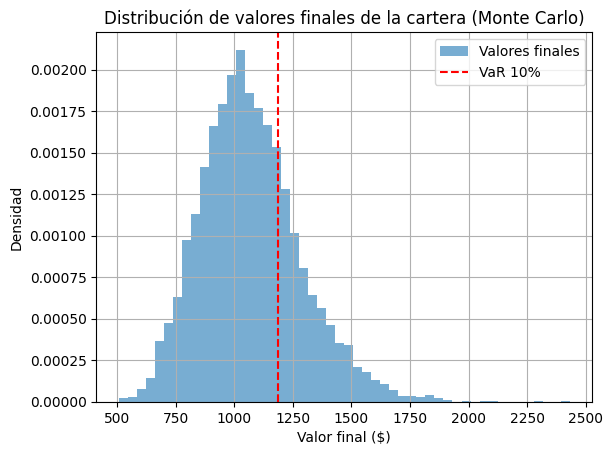

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 2. Parámetros de la simulación
mu = 0.05  # Retorno esperado anual
sigma = 0.2  # Volatilidad anual
n_simulaciones = 10_000
n_dias = 225 # Días hábiles por año
inversion_inicial = 1000  # USD

# 3. Simular retornos diarios (log-normal)
np.random.seed(42)
retornos_diarios = np.random.lognormal(mean=mu/n_dias, sigma=sigma/np.sqrt(n_dias),
                                       size=(n_simulaciones, n_dias))

# 4. Calcular valores finales
retornos_totales = np.sum(np.log(retornos_diarios), axis=1)
valores_finales = inversion_inicial * np.exp(retornos_totales)

# 5. Calcular VaR al 5%
VaR_10 = np.percentile(valores_finales - inversion_inicial, 10)
print(f"Valor en Riesgo (VaR) al 10%: ${-VaR_10:.2f}")

# 6. Prueba de normalidad (Kolmogorov-Smirnov)
ks_stat, p_value = stats.kstest(retornos_totales, 'norm',
                                args=(retornos_totales.mean(), retornos_totales.std()))

print(f"\nPrueba KS para normalidad de retornos totales:")
print(f"Estadístico KS: {ks_stat:.4f}, Valor p: {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula: los retornos totales siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los retornos totales no siguen una distribución normal.")

# 7. Visualizar la distribución de los valores finales
plt.hist(valores_finales, bins=50, density=True, alpha=0.6, label="Valores finales")
plt.axvline(inversion_inicial - VaR_5, color='red', linestyle='--', label='VaR 10%')
plt.title("Distribución de valores finales de la cartera (Monte Carlo)")
plt.xlabel("Valor final ($)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()
